# **Importing Modules**

In [ ]:
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,GlobalMaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import layers
import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Google Authorization**

In [ ]:
#Google Authorization
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# **Dataset Loading**

In [ ]:
#Access Google Drive
data = drive.CreateFile({'id':"1HWRVOShxAHq5DdSB-XVJZbj91_GO5_fz"})
data.GetContentFile("char74k.zip")

In [ ]:
!unzip "char74k.zip"

# **Splitting Dataset**

In [ ]:
def getFiles(path):
  return [name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]

In [ ]:
#Create Train-Validation-Test Folders
dataPath = "../content/data"
os.mkdir(dataPath)
trainPath = "train"
valPath = "validation"
testPath = "test"
os.mkdir(os.path.join(dataPath, trainPath))
os.mkdir(os.path.join(dataPath, valPath))
os.mkdir(os.path.join(dataPath, testPath))

classPath = "../content/English/Img/GoodImg/Bmp/"
classes = [x[0].split('/')[-1] for x in os.walk(classPath) if x[0]!= classPath]
classes = sorted(classes)
print(len(classes))
for i in range(0,len(classes)):
  os.mkdir(os.path.join(dataPath, trainPath, classes[i] ))
  os.mkdir(os.path.join(dataPath, valPath, classes[i] ))
  os.mkdir(os.path.join(dataPath, testPath, classes[i] ))


62


In [ ]:
#Split the Dataset in Train, Validation and Test Parts
trainSplit = 0.9
valSplit = 0.05
testSplit = 0.05

imgFolders = ["../content/English/Img/GoodImg/Bmp/", "../content/English/Fnt/", "../content/English/Hnd/Img/"]
for folder in imgFolders:
  for className in classes:
    images = getFiles(os.path.join(folder, className))
    count = len(images)
    trainImages = images[:int(count*trainSplit)]
    valImages = images[int(count*trainSplit): int(count*(trainSplit + valSplit))]
    testImages = images[int(count*(trainSplit + valSplit)):]
    i = len(getFiles(os.path.join(dataPath, trainPath, className))) + 1
    for image in trainImages:
      copyfile(os.path.join(folder, className, image), os.path.join(dataPath,trainPath, className, image))
      os.rename(os.path.join(dataPath, trainPath, className, image), os.path.join(dataPath, trainPath, className, className+"_"+str(i)+".png"))
      i = i+1
    i = len(getFiles(os.path.join(dataPath, valPath, className))) + 1
    for image in valImages:
      copyfile(os.path.join(folder, className, image), os.path.join(dataPath,valPath, className, image))
      os.rename(os.path.join(dataPath, valPath, className, image), os.path.join(dataPath, valPath, className, className+"_"+str(i)+".png"))
      i = i+1
    i = len(getFiles(os.path.join(dataPath, testPath, className))) + 1
    for image in testImages:
      copyfile(os.path.join(folder, className, image), os.path.join(dataPath,testPath, className, image))
      os.rename(os.path.join(dataPath, testPath, className, image), os.path.join(dataPath, testPath, className, className+"_"+str(i)+".png"))
      i = i+1

In [ ]:
imgCount = 0
for folder in imgFolders:
  for className in classes:
    imgCount = imgCount + len(getFiles(os.path.join(folder, className)))
print("Total images in dataset:",imgCount)

Total images in dataset: 74107


In [ ]:
trainCount = 0
for className in classes:
  trainCount = trainCount + len(getFiles(os.path.join(dataPath, trainPath, className)))
print("Training Images: ",trainCount)

Training Images:  66611


In [ ]:
valCount = 0
for className in classes:
  valCount = valCount + len(getFiles(os.path.join(dataPath, valPath, className)))
print("Validation Images: ",valCount)

Validation Images:  3734


In [ ]:
testCount = 0
for className in classes:
  testCount = testCount + len(getFiles(os.path.join(dataPath, testPath, className)))
print("Test Images: ", testCount)

Test Images:  3762


In [ ]:
!zip -r "../content/train.zip" "../content/data/train"

In [ ]:
!zip -r "../content/test.zip" "../content/data/test"

In [ ]:
!zip -r "../content/val.zip" "../content/data/validation"

# **Loading Train Validation Test**

In [ ]:
#Load Train, Validation and Test from Zip

#Load train.zip from Drive
data = drive.CreateFile({'id':"11-axPxTxuhrbWVFCgEampK6SWmptvsOh"})
data.GetContentFile("OCR-train.zip")

#Load val.zip from Drive
data = drive.CreateFile({'id':"19bZILzTF1a6gIhNqa6FQhhBB1TBMDYA0"})
data.GetContentFile("OCR-val.zip")

#Load test.zip from Drive
data = drive.CreateFile({'id':"1GQ2lWfx1YpQLuynJC0ABTUoL6UikGHwo"})
data.GetContentFile("OCR-test.zip")

In [ ]:
!unzip "OCR-train.zip"
!unzip "OCR-val.zip"
!unzip "OCR-test.zip"

In [ ]:
dataPath = "content/data"
trainPath = "train"
valPath = "validation"
testPath = "test"
classPath = os.path.join(dataPath, trainPath)
classes = [x[0].split('/')[-1] for x in os.walk(classPath) if x[0]!= classPath]
classes = sorted(classes)
print(len(classes))
print(classes)

62
['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062']


In [ ]:
def getFiles(path):
  return [name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]

In [ ]:
trainCount = 0
for className in classes:
  trainCount = trainCount + len(getFiles(os.path.join(dataPath, trainPath, className)))
print("Training Images: ",trainCount)

Training Images:  66611


In [ ]:
valCount = 0
for className in classes:
  valCount = valCount + len(getFiles(os.path.join(dataPath, valPath, className)))
print("Validation Images: ",valCount)

Validation Images:  3734


In [ ]:
testCount = 0
for className in classes:
  testCount = testCount + len(getFiles(os.path.join(dataPath, testPath, className)))
print("Test Images: ", testCount)

Test Images:  3762


In [ ]:
#Frequency of each Class in Training Split
classCount = {"train": [0 for i in range(62)], "val": [0 for i in range(62)], "test": [0 for i in range(62)] }
i = 0
for className in classes:
  classCount["train"][i] = len(getFiles(os.path.join(dataPath, trainPath, className)))
  i = i+1
print("Train Count: ", classCount["train"])
print(sum(classCount["train"]))

Train Count:  [1057, 1034, 1026, 1008, 1005, 1020, 1020, 1006, 991, 993, 1465, 1066, 1156, 1134, 1364, 1034, 1091, 1136, 1234, 1032, 1045, 1156, 1097, 1289, 1306, 1106, 994, 1313, 1270, 1243, 1045, 1038, 1023, 1035, 1023, 1012, 1105, 997, 1019, 1004, 1167, 996, 995, 1009, 1077, 992, 993, 1015, 1001, 1084, 1096, 996, 1011, 1076, 1074, 1062, 999, 992, 995, 994, 1001, 994]
66611


In [ ]:
#Frequency of each Class in Validation Split
i = 0
for className in classes:
  classCount["val"][i] = len(getFiles(os.path.join(dataPath, valPath, className)))
  i = i+1
print("Validation Count: ", classCount["val"])
print(sum(classCount["val"]))

Validation Count:  [59, 58, 57, 56, 56, 57, 57, 56, 56, 56, 82, 60, 65, 64, 76, 58, 61, 64, 69, 58, 59, 65, 61, 72, 73, 62, 56, 73, 71, 70, 59, 58, 57, 58, 57, 57, 62, 56, 57, 56, 65, 56, 56, 57, 60, 56, 56, 57, 56, 61, 61, 56, 57, 60, 60, 60, 56, 56, 56, 56, 56, 56]
3734


In [ ]:
#Frequency of each Class in Test Split
i = 0
for className in classes:
  classCount["test"][i] = len(getFiles(os.path.join(dataPath, testPath, className)))
  i = i+1
print("Test Count: ", classCount["test"])
print(sum(classCount["test"]))

Test Count:  [60, 58, 58, 57, 57, 58, 58, 57, 56, 56, 82, 60, 65, 64, 77, 58, 62, 64, 70, 58, 59, 65, 62, 73, 74, 62, 56, 74, 72, 70, 59, 59, 58, 58, 58, 57, 62, 56, 58, 57, 66, 56, 56, 57, 61, 56, 56, 57, 57, 61, 62, 56, 57, 61, 61, 60, 57, 56, 56, 56, 57, 56]
3762


# **Model Building**

In [ ]:
#Initializing ImageDataGenerators
trainFlow = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2)

valFlow = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2)

testFlow = ImageDataGenerator(
    rescale=1./255)



In [ ]:
#Initializing Generators

trainGenerator = trainFlow.flow_from_directory(
    'content/data/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

valGenerator = valFlow.flow_from_directory(
    'content/data/validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')


testGenerator = testFlow.flow_from_directory(
    'content/data/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 66611 images belonging to 62 classes.
Found 3734 images belonging to 62 classes.
Found 3762 images belonging to 62 classes.


In [ ]:
ocrModel = Sequential()
ocrModel.add(Conv2D(16, (5, 5), input_shape=(None, None ,3)))
ocrModel.add(Activation('relu'))
ocrModel.add(MaxPooling2D(pool_size=(2, 2)))

ocrModel.add(Conv2D(32, (5, 5)))
ocrModel.add(Activation('relu'))
ocrModel.add(MaxPooling2D(pool_size=(2, 2)))


ocrModel.add(Conv2D(64, (5, 5)))
ocrModel.add(Activation('relu'))
ocrModel.add(MaxPooling2D(pool_size=(2, 2)))


ocrModel.add(Conv2D(128, (5, 5)))
ocrModel.add(Activation('relu'))
ocrModel.add(GlobalMaxPooling2D())

ocrModel.add(layers.Flatten())
ocrModel.add(layers.Dense(2048))
ocrModel.add(layers.Dense(1024))
ocrModel.add(layers.Dense(512))
ocrModel.add(layers.Dense(256))
ocrModel.add(Dense(62, activation='softmax'))


In [ ]:
ocrModel.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.00005),
              metrics=['accuracy'])

In [ ]:
history = ocrModel.fit(
    trainGenerator,
    steps_per_epoch=int(trainCount/32),
    epochs=3,
    validation_data=valGenerator,
    validation_steps=int(valCount/32))

Epoch 1/3
2081/2081 [==============================] - 2022s 972ms/step - loss: 0.2980 - accuracy: 0.8834 - val_loss: 0.3745 - val_accuracy: 0.8618
Epoch 2/3
2081/2081 [==============================] - 2022s 972ms/step - loss: 0.2913 - accuracy: 0.8851 - val_loss: 0.3725 - val_accuracy: 0.8648
Epoch 3/3
2081/2081 [==============================] - 2015s 968ms/step - loss: 0.2857 - accuracy: 0.8873 - val_loss: 0.3606 - val_accuracy: 0.8696


In [ ]:
testHistory = ocrModel.evaluate(testGenerator, steps = int( testCount// 32), 
                   batch_size = 32)

117/117 [==============================] - 29s 246ms/step - loss: 0.3306 - accuracy: 0.8838


In [ ]:
testGenerator1 = testFlow.flow_from_directory(
    'English/Img/BadImag/Bmp/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 4798 images belonging to 62 classes.


In [ ]:
testHistory1 = ocrModel.evaluate(testGenerator1, steps = int( testCount// 32), 
                   batch_size = 32)

117/117 [==============================] - 28s 239ms/step - loss: 1.9118 - accuracy: 0.5377


In [ ]:
testAccuracy = [0.8208, 0.832, 0.8649, 0.8726, 8860]
testLoss = [0.470, 0.430, 0.3852, 0.3619, 0.3200 ]

In [ ]:
ocrModel.save("ocrModel-VI")

INFO:tensorflow:Assets written to: ocrModel-VI/assets


In [ ]:
trainAccuracy = [0.8177353143692017, 0.8262515068054199, 0.8368104100227356, 0.8420222401618958, 0.8487961888313293, 0.852941632270813, 0.8573574423789978, 0.8609020709991455, 0.8668649196624756, 0.8681265711784363, 0.8709352612495422, 0.8748854994773865, 0.8906412124633789, 0.8932396173477173, 0.8977004885673523]
trainLoss = [0.5379915237426758, 0.49186018109321594, 0.457203209400177, 0.4350758194923401, 0.4124700129032135, 0.39551401138305664, 0.3805806338787079, 0.3629201054573059, 0.3519112467765808, 0.34516268968582153, 0.33399498462677, 0.3218408226966858, 0.27402716875076294, 0.2630642354488373, 0.2564932405948639]
valAccuracy = [0.8211206793785095, 0.8168103694915771, 0.818965494632721, 0.8213900923728943, 0.8370150923728943, 0.8324353694915771, 0.8429418206214905, 0.8472521305084229, 0.8534482717514038, 0.8550646305084229, 0.8488685488700867, 0.8521012663841248, 0.8690732717514038, 0.8760775923728943, 0.8712284564971924]
valLoss = [0.5263432860374451, 0.5248925089836121, 0.48206838965415955, 0.47116735577583313, 0.45383360981941223, 0.43013644218444824, 0.4246196448802948, 0.4343908429145813, 0.38943707942962646, 0.39389631152153015, 0.4089111089706421, 0.4056259095668793, 0.34501421451568604, 0.32802510261535645, 0.34889858961105347]

In [ ]:
print(len(valLoss))

9


In [ ]:
print(history.history["accuracy"])

[0.8906412124633789, 0.8932396173477173, 0.8977004885673523]


In [ ]:
print(history.history["loss"])

[0.27402716875076294, 0.2630642354488373, 0.2564932405948639]


In [ ]:
print(history.history["val_accuracy"])

[0.8690732717514038, 0.8760775923728943, 0.8712284564971924]


In [ ]:
print(history.history["val_loss"])

[0.34501421451568604, 0.32802510261535645, 0.34889858961105347]


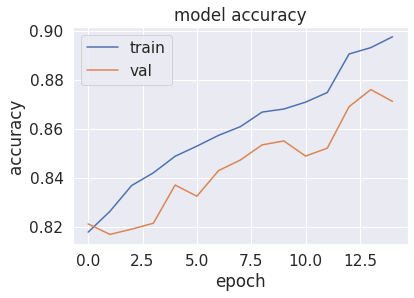

In [ ]:
#Plot Accuracy
plt.plot(trainAccuracy)
plt.plot(valAccuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

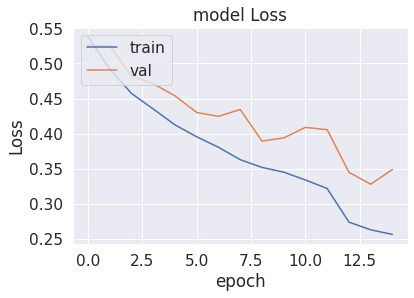

In [ ]:
#Plot Loss
plt.plot(trainLoss)
plt.plot(valLoss)
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Get Pre Trained Model (Epochs 4 - 6)
ocrModelFromDrive = drive.CreateFile({'id':"1kC0xp2o2OPCgP7k2XMNFmSiBOf_2sBhY"})
ocrModelFromDrive.GetContentFile("ocrModel-V.zip")
!unzip "ocrModel-V.zip"
ocrModel = keras.models.load_model('ocrModel-V')